# **DETECTING BRAIN TUMOR WITH CNN**

![](https://www.researchgate.net/profile/Tamije-Selvy-Perumal/publication/265477512/figure/fig1/AS:462790839279619@1487349342768/a-Original-MRI-brain-tumor-image-b-Colored-MRI-image.png)


*My aim is to predict whether a patient has any kind of tumor or not based on a MRI scan of brain.*

# Steps Involved

* Import all the necessary modules & load the data.
* Observe the data and determine the number of output classes (4 in this case).
* Define labels for each of the output class. 
* Read & save the images along with their respective labels.
* Create Train and Test set.
* Define the CNN model & set the number of output classes.
* Train & observe the model, then tune hyperparams accordingly.
* Predict & save our model.

In [1]:
!pip install Keras==2.9.0
!pip install Keras-Applications==1.0.8
!pip install Keras-Preprocessing==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.5 MB/s 
  Attempting uninstall: Keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 477 kB/s 
  Attempting uninstall: Keras-Preprocessing
    Found existing installation: Keras-Preproces

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 867 kB/s 
     |████████████████████████████████| 1.4 MB 9.4 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [3]:
import os
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.utils import shuffle

# Imports

# Checking available files/folders

In [4]:
path = "/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master"

In [5]:
list(os.listdir(path))

['Testing', 'Training']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

list(os.listdir(path + "/Training"))

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

In [8]:
list(os.listdir(path + "/Testing"))

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']

# Define labels of the output classes

In [9]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

inverse_class_map = {
    0: 'no_tumor',
    1: 'glioma_tumor',
    2: 'meningioma_tumor',
    3: 'pituitary_tumor'
}

# Set Hyperparameters

In [22]:
h, w = 224, 224
batch_size = 32
epochs = 4

# Reading the image & saving as np.array, along with their respective labels

In [11]:
IMAGE = []
LABELS = []

for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Training', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(h, w))
        IMAGE.append(img)
        LABELS.append(class_map[label])
            
        
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Testing', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(h, w))
        IMAGE.append(img)
        LABELS.append(class_map[label])
        
X = np.array(IMAGE)
y = np.array(LABELS)

100%|██████████| 74/74 [00:21<00:00,  3.51it/s]


# Looking at different types of tumor

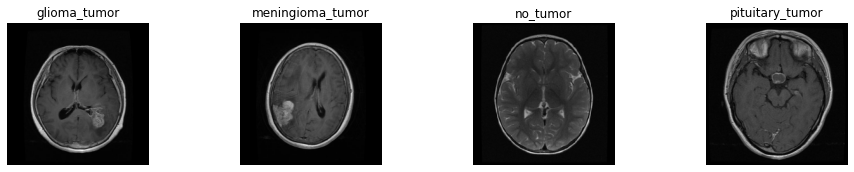

In [12]:
plt.figure(figsize=(16, 12))

path = '/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Training'
fileNames = ['/glioma_tumor/gg (10).jpg', '/meningioma_tumor/m (108).jpg', '/no_tumor/image (16).jpg', '/pituitary_tumor/p (12).jpg']
fileLabels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    img = mpimg.imread(path + fileNames[i])
    img = cv2.resize(img, (h, w))
    plt.imshow(img)
    plt.title(fileLabels[i])
    plt.axis("off")

In [13]:
!pip install keras.utils 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=3577be9932acd26bd2f117b1b2c3c7d9d73837ed754eacf3f45cf78e287d0d69
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


# Create Train & Test sets

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.1, random_state=42)

In [16]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import MobileNet, MobileNetV2, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define CNN model

In [17]:
# base_model = MobileNet(
#     input_shape=(h, w, 3), 
#     weights='imagenet',
#     include_top=False, 
#     pooling='avg'
# )

base_model = VGG16(
    input_shape=(h, w, 3), 
    weights='imagenet',
    include_top=False, 
    pooling='max'
)

base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

# Set the no. of output class of the model

In [18]:
base_model.trainable = False

output_class = 4

model = Sequential([
    base_model,
    Dropout(rate=0.5),
    Dense(output_class, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


# Defining Callbacks

In [19]:
earlystop = EarlyStopping(monitor='val_loss', patience=5)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

# Image Augmentation

In [20]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Training our model

In [23]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), validation_data = (X_test, y_test),
                    steps_per_epoch = len(X_train) / batch_size, epochs = epochs, callbacks = callbacks)

Epoch 1/4
91/91 [==============================] - 1672s 18s/step - loss: 1.5416 - accuracy: 0.3572 - val_loss: 39.2243 - val_accuracy: 0.3119 - lr: 0.0010
Epoch 2/4
91/91 [==============================] - 1696s 18s/step - loss: 1.2532 - accuracy: 0.4528 - val_loss: 52.0420 - val_accuracy: 0.3089 - lr: 0.0010
Epoch 3/4
91/91 [==============================] - 1676s 18s/step - loss: 1.1031 - accuracy: 0.5431 - val_loss: 67.3123 - val_accuracy: 0.3150 - lr: 0.0010
Epoch 4/4
91/91 [==============================] - 1671s 18s/step - loss: 1.0281 - accuracy: 0.5676 - val_loss: 71.5274 - val_accuracy: 0.3180 - lr: 0.0010


# Checking model performance

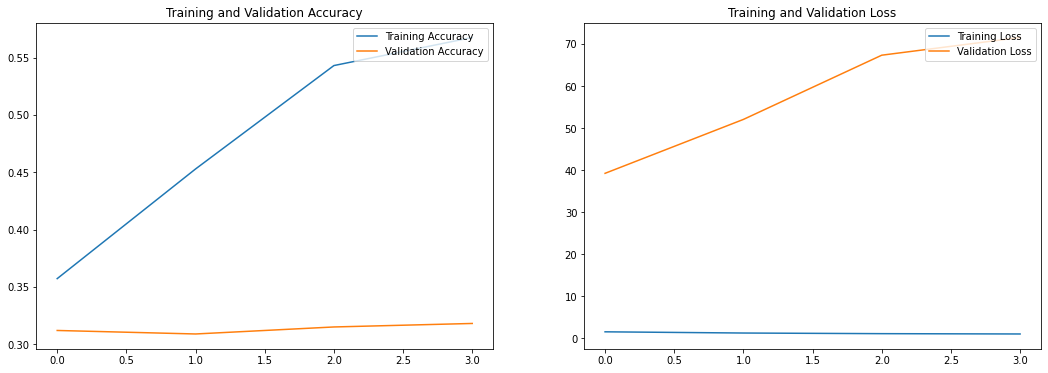

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predicting with our model

In [25]:
predicted_labels = model.predict(X_test)
print(predicted_labels[:5])

[[8.5744307e-15 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [3.3842789e-26 1.8705565e-07 9.9999976e-01 0.0000000e+00]
 [3.9363796e-24 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 4.7037901e-11 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [26]:
predicted_labels = [np.argmax(i) for i in predicted_labels]
print(predicted_labels[:5])

[2, 2, 2, 0, 0]


In [27]:
original_labels =[np.argmax(i) for i in y_test]
print(original_labels[:5])

[3, 1, 2, 3, 1]


# Checking prediction accuracy with confusion matrix

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

conf_mat = confusion_matrix(original_labels, predicted_labels)
report = classification_report(original_labels, predicted_labels)

print('Confusion Matrix ==>')
print(conf_mat)
print('----------------------------------------------------------------------------------------')
print('Classification Report ==>')
print(report)

Confusion Matrix ==>
[[48  0  0  0]
 [38  2 60  0]
 [37  2 54  0]
 [49  0 37  0]]
----------------------------------------------------------------------------------------
Classification Report ==>
              precision    recall  f1-score   support

           0       0.28      1.00      0.44        48
           1       0.50      0.02      0.04       100
           2       0.36      0.58      0.44        93
           3       0.00      0.00      0.00        86

    accuracy                           0.32       327
   macro avg       0.28      0.40      0.23       327
weighted avg       0.30      0.32      0.20       327



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Converting labels to their respective class names

In [29]:
predicted_labels = [inverse_class_map[x] for x in predicted_labels]
print(predicted_labels[:5])

['meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'no_tumor', 'no_tumor']


# Saving our model

In [30]:
# model.save("tumorModel.h5")